In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("ride.csv") 
df   

,ride_id,pickup_location,drop_location,booking_hour,day_of_week,ride_distance_km,driver_rating,customer_rating,surge_pricing,weather,cancelled
0,1,Mall,Mall,6,Friday,38.45,4.1,3.2,1.0,Stormy,1
1,2,Residential Area,Mall,10,Wednesday,30.78,3.3,4.7,1.3,Clear,1
2,3,Railway Station,Mall,9,Thursday,34.35,4.4,4.0,2.3,Rainy,1
3,4,Residential Area,Mall,8,Monday,24.52,4.8,3.0,2.5,Clear,1
4,5,Residential Area,Residential Area,13,Friday,33.58,4.5,4.6,2.6,Clear,0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Airport,Downtown,20,Monday,5.51,4.5,4.0,2.1,Foggy,0
996,997,Downtown,Residential Area,20,Wednesday,2.06,3.3,4.4,1.4,Clear,1
997,998,Downtown,Downtown,4,Sunday,21.42,3.9,4.8,1.2,Stormy,0
998,999,Mall,Residential Area,15,Monday,9.51,4.0,3.3,1.1,Foggy,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ride_id           1000 non-null   int64  
 1   pickup_location   1000 non-null   object 
 2   drop_location     1000 non-null   object 
 3   booking_hour      1000 non-null   int64  
 4   day_of_week       1000 non-null   object 
 5   ride_distance_km  1000 non-null   float64
 6   driver_rating     1000 non-null   float64
 7   customer_rating   1000 non-null   float64
 8   surge_pricing     1000 non-null   float64
 9   weather           1000 non-null   object 
 10  cancelled         1000 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 86.1+ KB


In [3]:
df.isnull().sum()

ride_id             0
pickup_location     0
drop_location       0
booking_hour        0
day_of_week         0
ride_distance_km    0
driver_rating       0
customer_rating     0
surge_pricing       0
weather             0
cancelled           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,ride_id,booking_hour,ride_distance_km,driver_rating,customer_rating,surge_pricing,cancelled
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,11.619000,21.005000,3.963600,3.979100,1.995800,0.590000
std,288.819436,7.051636,11.094567,0.587026,0.575034,0.576658,0.492079
min,1.000000,0.000000,1.020000,3.000000,3.000000,1.000000,0.000000
25%,250.750000,5.000000,11.725000,3.500000,3.500000,1.500000,0.000000
50%,500.500000,12.000000,21.300000,3.900000,4.000000,2.000000,1.000000
75%,750.250000,18.000000,30.680000,4.500000,4.500000,2.500000,1.000000
max,1000.000000,23.000000,39.980000,5.000000,5.000000,3.000000,1.000000


In [6]:
df = pd.get_dummies(
    df,
    columns=['pickup_location','drop_location','weather'],
    drop_first=True
)


In [7]:
df_numeric = df.select_dtypes(include='number')
corr = df_numeric.corr()
corr



,ride_id,booking_hour,ride_distance_km,driver_rating,customer_rating,surge_pricing,cancelled
ride_id,1.000000,0.050753,0.007320,0.022544,-0.044415,0.007326,-0.029434
booking_hour,0.050753,1.000000,0.028160,-0.020063,-0.034230,0.019767,0.004267
ride_distance_km,0.007320,0.028160,1.000000,0.029127,-0.003137,-0.005728,0.067384
driver_rating,0.022544,-0.020063,0.029127,1.000000,-0.031643,-0.000748,-0.103003
customer_rating,-0.044415,-0.034230,-0.003137,-0.031643,1.000000,-0.051432,-0.010149
surge_pricing,0.007326,0.019767,-0.005728,-0.000748,-0.051432,1.000000,0.075413
cancelled,-0.029434,0.004267,0.067384,-0.103003,-0.010149,0.075413,1.000000


In [8]:
# So 1 column became many binary columns (0/1).
# weather_Rainy = 1  
# weather_Foggy = 0  
# weather_Stormy = 0 
df.columns


Index(['ride_id', 'booking_hour', 'day_of_week', 'ride_distance_km',
       'driver_rating', 'customer_rating', 'surge_pricing', 'cancelled',
       'pickup_location_Downtown', 'pickup_location_Mall',
       'pickup_location_Railway Station', 'pickup_location_Residential Area',
       'drop_location_Downtown', 'drop_location_Mall',
       'drop_location_Railway Station', 'drop_location_Residential Area',
       'weather_Foggy', 'weather_Rainy', 'weather_Stormy'],
      dtype='object')

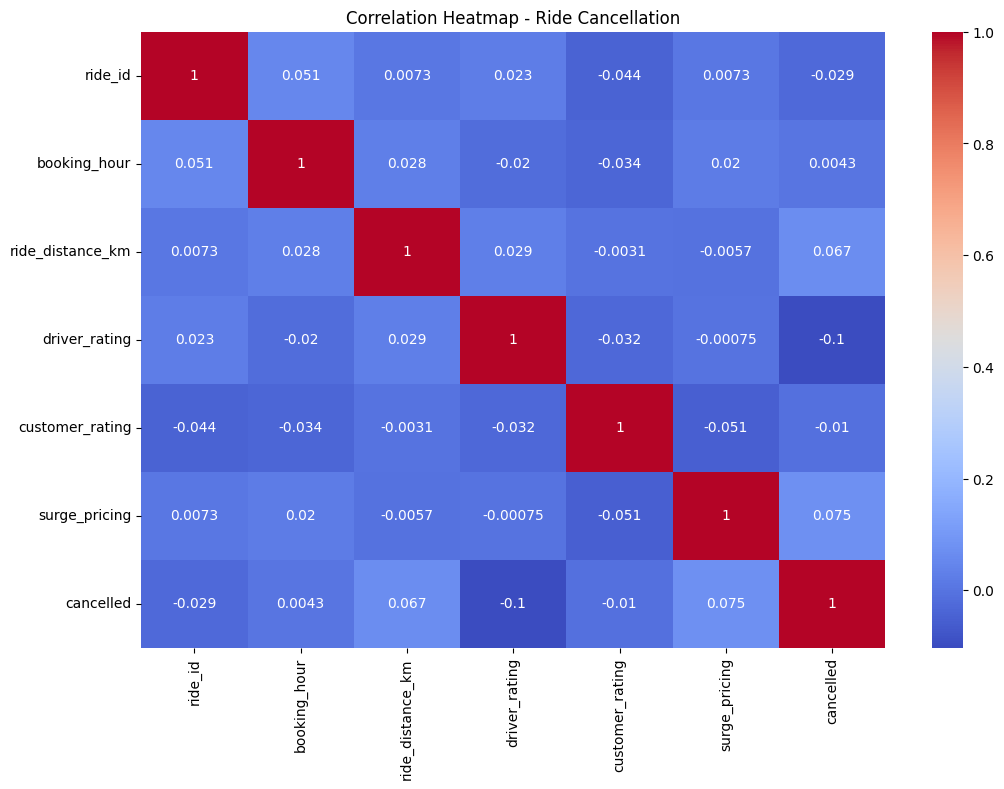

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap - Ride Cancellation")
plt.show()


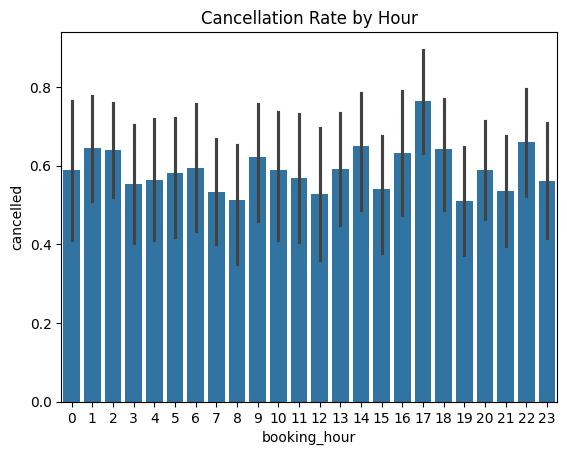

In [10]:
# Shows at which hours cancellations are high (usually late night & peak).
sns.barplot(x='booking_hour', y='cancelled', data=df)
plt.title("Cancellation Rate by Hour")
plt.show()


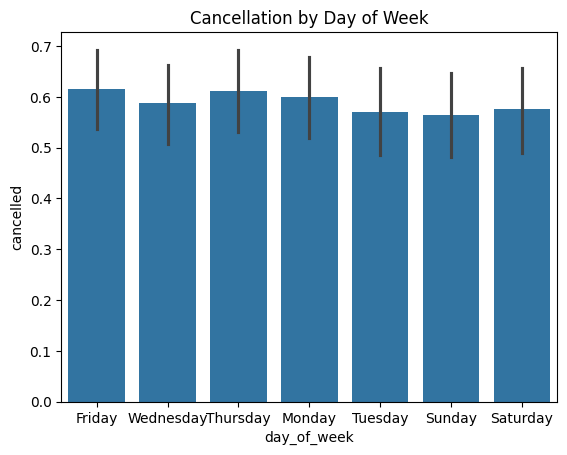

In [11]:
# Weekend vs weekday cancellation trend.
sns.barplot(x='day_of_week', y='cancelled', data=df)
plt.title("Cancellation by Day of Week")
plt.show()


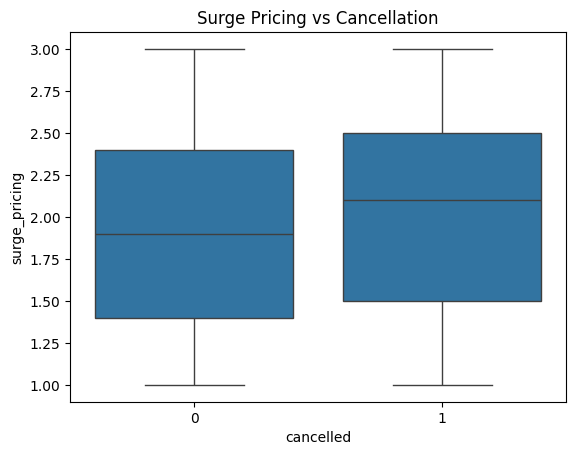

In [12]:
# Cancelled rides usually have higher surge.
sns.boxplot(x='cancelled', y='surge_pricing', data=df)
plt.title("Surge Pricing vs Cancellation")
plt.show()


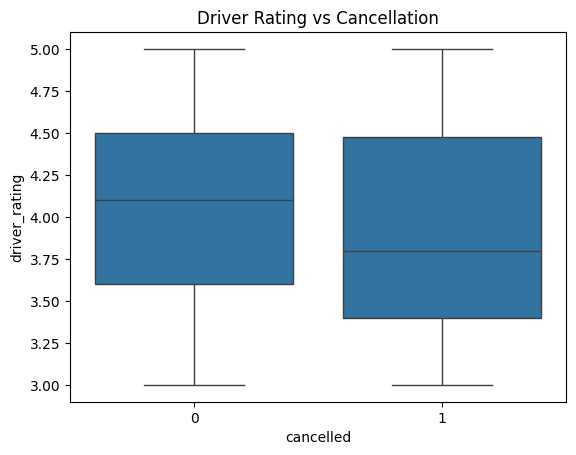

In [13]:
# Low-rated drivers → more cancellations.
sns.boxplot(x='cancelled', y='driver_rating', data=df)
plt.title("Driver Rating vs Cancellation")
plt.show()


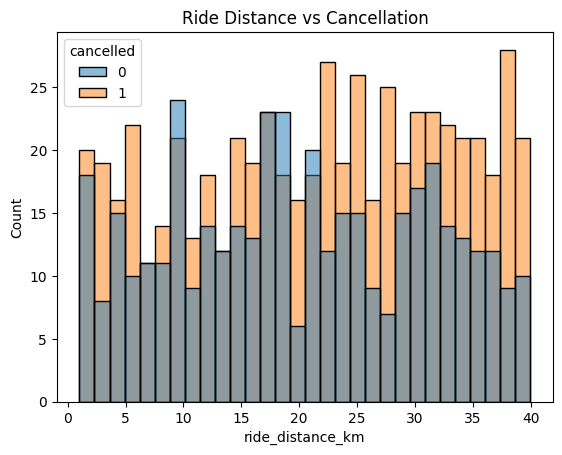

In [14]:
# Very short & very long rides cancel more.
# Blue (0) → Not cancelled
# Orange (1) → Cancelled
sns.histplot(data=df, x='ride_distance_km', hue='cancelled', bins=30)
plt.title("Ride Distance vs Cancellation")
plt.show()


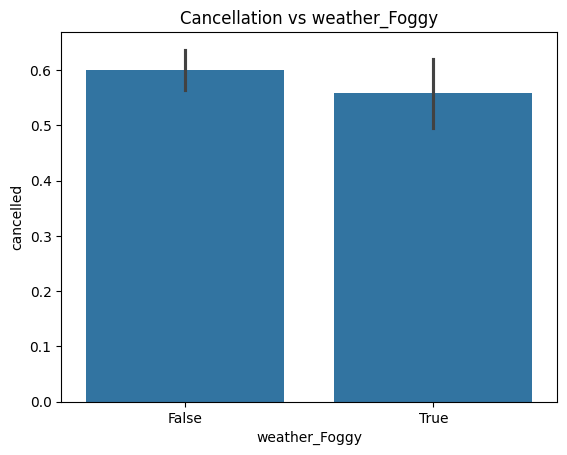

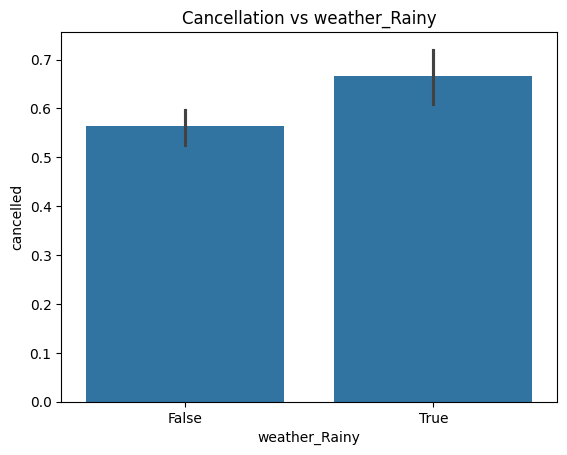

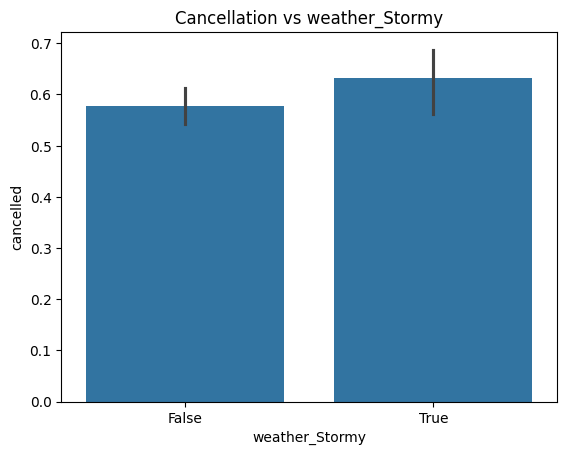

In [15]:
# Rain / Fog / Storm increases risk.
weather_cols = [col for col in df.columns if 'weather_' in col]

for col in weather_cols:
    sns.barplot(x=df[col], y=df['cancelled'])
    plt.title(f"Cancellation vs {col}")
    plt.show()


In [16]:
df = pd.get_dummies(df, drop_first=True)


In [17]:
# "Take the whole dataset and remove the column cancelled."
X = df.drop('cancelled', axis=1)

# "Take only the cancelled column."
y = df['cancelled']


In [18]:
from sklearn.model_selection import train_test_split
# 750 rides → Training
# 250 rides → Testing

X_train, X_test, y_train, y_test = train_test_split(                 
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# X → Inputs (features)
# y → Output (cancelled)


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


[[ 32  71]
 [ 23 124]]
              precision    recall  f1-score   support

           0       0.58      0.31      0.41       103
           1       0.64      0.84      0.73       147

    accuracy                           0.62       250
   macro avg       0.61      0.58      0.57       250
weighted avg       0.61      0.62      0.59       250

ROC-AUC: 0.5633709794597451


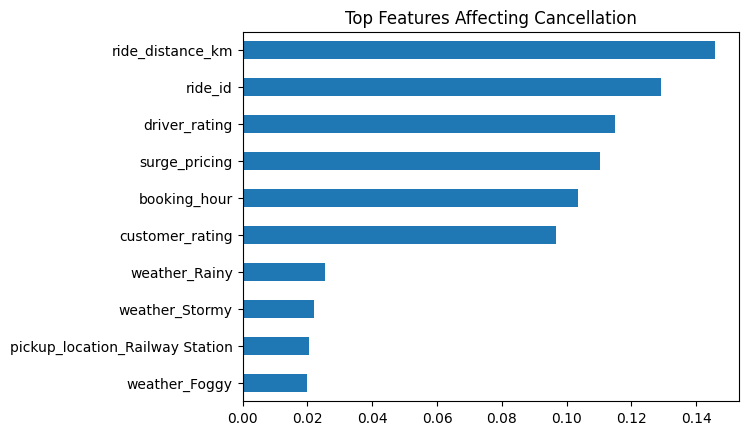

In [21]:
# Feature importance plot
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().tail(10).plot(kind='barh')
plt.title("Top Features Affecting Cancellation")
plt.show()

# client are cancelled because of this


In [22]:
def predict_cancellation(input_data):
    """
    input_data: dataframe with same columns as X
    """
    prob = model.predict_proba(input_data)[0][1]
    
    if prob > 0.6:
        return f"HIGH RISK of cancellation ({prob:.2f})"
    else:
        return f"LOW RISK of cancellation ({prob:.2f})"


In [26]:
# “Give me the 5th row from X_test.”
sample = X_test.iloc[[0]]
predict_cancellation(sample)


'HIGH RISK of cancellation (0.71)'

In [24]:
import joblib

# Save trained model
joblib.dump(model, "ride_cancellation_model.pkl")

# Save column names
joblib.dump(X.columns, "model_columns.pkl")


['model_columns.pkl']